In [837]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


****Thuật toán Decision Trees****

In [838]:
import pandas as pd
# Đọc tập dữ liệu và đặt tên cho các cột
diamonds = pd.read_csv('/kaggle/input/diamonds/diamonds.csv', index_col=0)
# In ra 5 dòng đầu tiên của tập dữ liệu
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [839]:
# Kiểm tra thông tin của tập dữ liệu
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [840]:
# Kiểm tra xem có giá trị null không
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [841]:
# Kiểm tra xem có giá trị trùng lặp không
diamonds.duplicated().sum()

146

In [842]:
# Xóa các dòng trùng lặp
diamonds = diamonds.drop_duplicates()

In [843]:
# Kiểm tra lại xem có giá trị trùng lặp không
diamonds.duplicated().sum()

0

In [844]:
# Chuẩn hóa dữ liệu cột 'carat'
diamonds['carat'] = (diamonds['carat'] - diamonds['carat'].min()) / (diamonds['carat'].max() - diamonds['carat'].min())

In [845]:
#Mã hóa dữ liệu sang số
diamonds['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}, inplace=True)
diamonds['color'].replace({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}, inplace=True)
diamonds['clarity'].replace({'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}, inplace=True)

In [846]:
# Xem số liệu sau khi mã hóa
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.124279,3.904134,4.406086,4.081663,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.098418,1.116098,1.701117,1.769560,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.000000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.041580,3.000000,3.000000,2.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.103950,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,0.174636,5.000000,6.000000,5.000000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,1.000000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


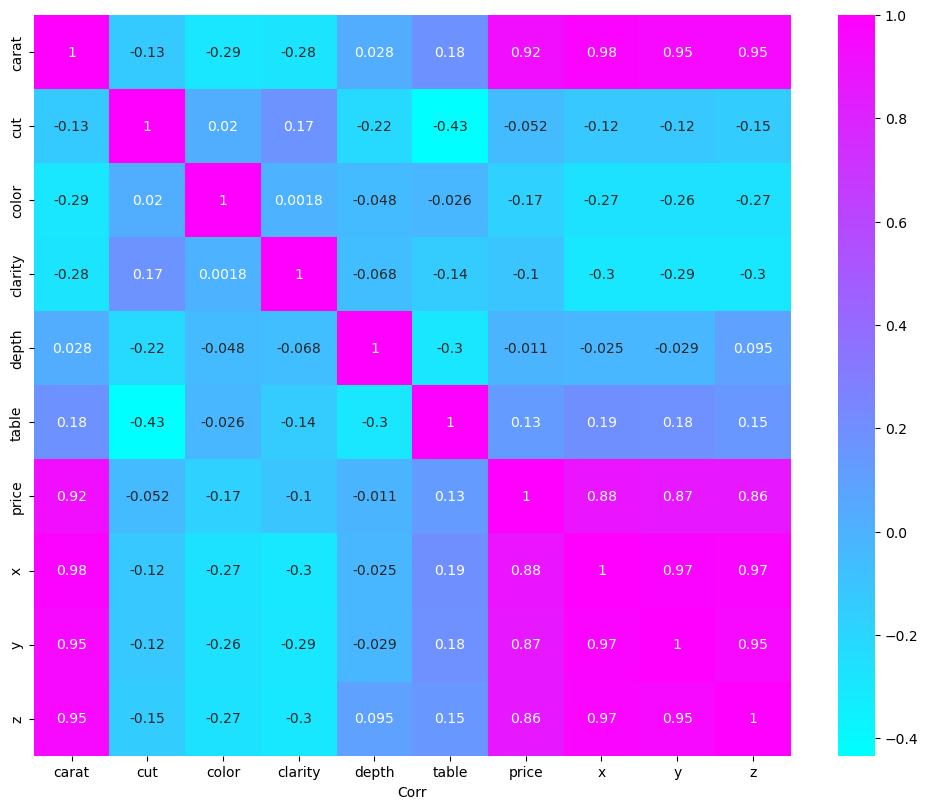

In [847]:
#Biểu đồ thể hiện mối tương quan giữa các thuộc tính.
plt.figure(figsize=(10, 8))
sns.heatmap(diamonds.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

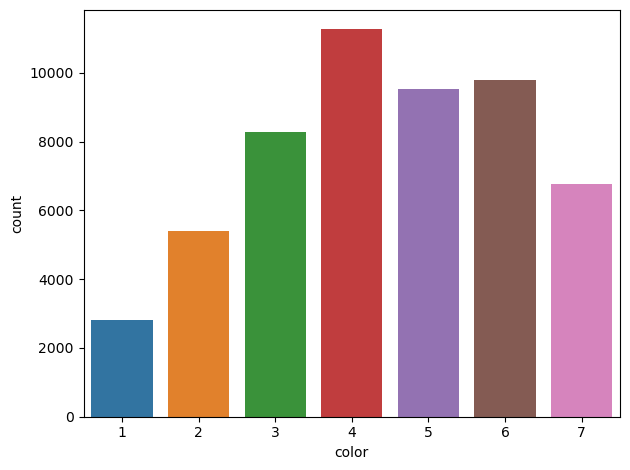

In [848]:
#Mô hình đếm số lượng về màu sắccủa kim cương
ax = sns.countplot(x='color', data=diamonds)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()


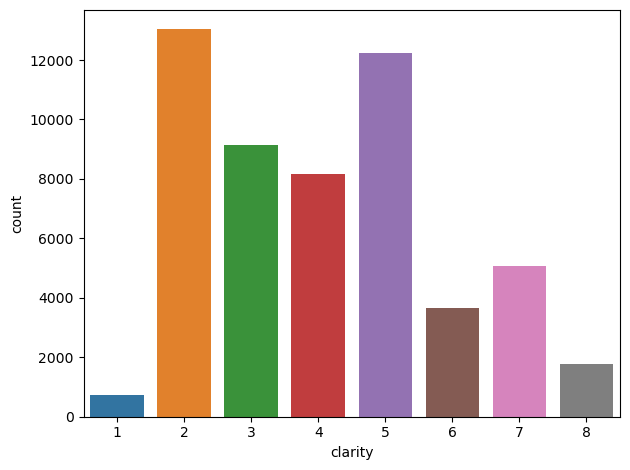

In [849]:
#Mô hình đếm số lượng chất lượng hợp chất của kim cương
ax = sns.countplot(x='clarity', data=diamonds)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

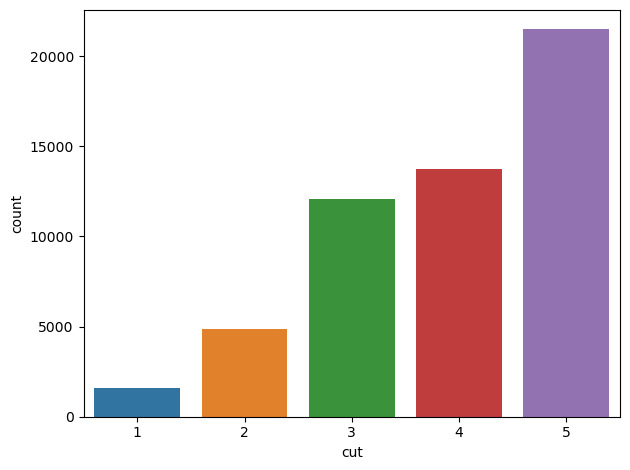

In [850]:
#Mô hình thể hiện số lượng chất lượng cắt của kim cương
ax = sns.countplot(x='cut', data=diamonds)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

In [851]:
# Chọn các thuộc tính và đầu ra cần sử dụng
X = diamonds[['carat', 'cut', 'clarity', 'depth']]
Y = diamonds['price']

In [852]:
# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [853]:
# Khởi tạo mô hình cây quyết định
dt_model = DecisionTreeRegressor(random_state=42)

In [854]:
# Huấn luyện mô hình trên tập train
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [855]:
# Dự đoán giá trên tập test
Y_pred = dt_model.predict(X_test)

In [856]:
# Đánh giá độ chính xác của mô hình
r2 = r2_score(Y_test, Y_pred)
print('Độ chính xác của mô hình Decision Trees là:', r2)

Độ chính xác của mô hình Decision Trees là: 0.9042685041812993


In [857]:
#Xây dựng mô hình
model = LinearRegression()

In [858]:
# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)

LinearRegression()

In [859]:
# Đánh giá hiệu suất của mô hình trên dữ liệu kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('RMSE:', rmse)

RMSE: 0.07375010711246824


In [860]:
# Chọn các feature quan trọng để đưa vào mô hình
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']
X = diamonds[features]
y = diamonds['price']

In [861]:
# Xây dựng mô hình Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=6, random_state=0)
model.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [862]:
# Truyền vào thông tin của một viên kim cương
new_diamond = {'carat': 0.35, 'cut': 2, 'color': 4, 'clarity': 3, 'depth': 50, 'table': 57}

In [863]:
# Đưa thông tin của viên kim cương mới vào một dataframe
new_diamond = pd.DataFrame([new_diamond])

In [864]:
# Dự đoán giá trị của kim cương
new_diamond_price = model.predict(new_diamond[features])
print("Giá trị dự đoán của viên kim cương mới là:", new_diamond_price[0])

Giá trị dự đoán của viên kim cương mới là: 10606.015165876777
